# Import Libraries

In [241]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kendalltau, spearmanr, chi2_contingency

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import classification_report , recall_score, f1_score , precision_score, accuracy_score , ConfusionMatrixDisplay

from feature_engine.outliers import Winsorizer

import pickle


# Data Loading

In [242]:
# Read csv
df_ori = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [243]:
# Copy the DataFrame
df = df_ori.copy()

In [244]:
# Show all columns
pd.options.display.max_columns = None

In [245]:
# Show first 10
df.head(11)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [246]:
# Show last 10
df.tail(11)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70681,1.0,0.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,0.0,7.0,6.0,6.0
70682,1.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,1.0,0.0,9.0,2.0,1.0
70683,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,4.0,3.0
70684,1.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,30.0,5.0,0.0,1.0,9.0,4.0,5.0
70685,1.0,1.0,0.0,1.0,38.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,6.0,2.0
70686,1.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [248]:
df.shape

(70692, 22)

this dataframe consists of 70692 rows and 22 columns

In [249]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [250]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Check Duplicated Data

In [251]:
# Check for Duplicates
df.duplicated().sum()

1635

In [252]:
#check which data is duplicated
duplicate = df[df.duplicated()]
duplicate.head(11)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
1384,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,6.0,8.0
1533,0.0,0.0,1.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,6.0,7.0
1565,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1771,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
1909,0.0,1.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


In [253]:
# eliminating 1635 duplicate rows
df.drop_duplicates(inplace = True)

### Handle Missing Values

In [254]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing values found thus nothing to handle.

# Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

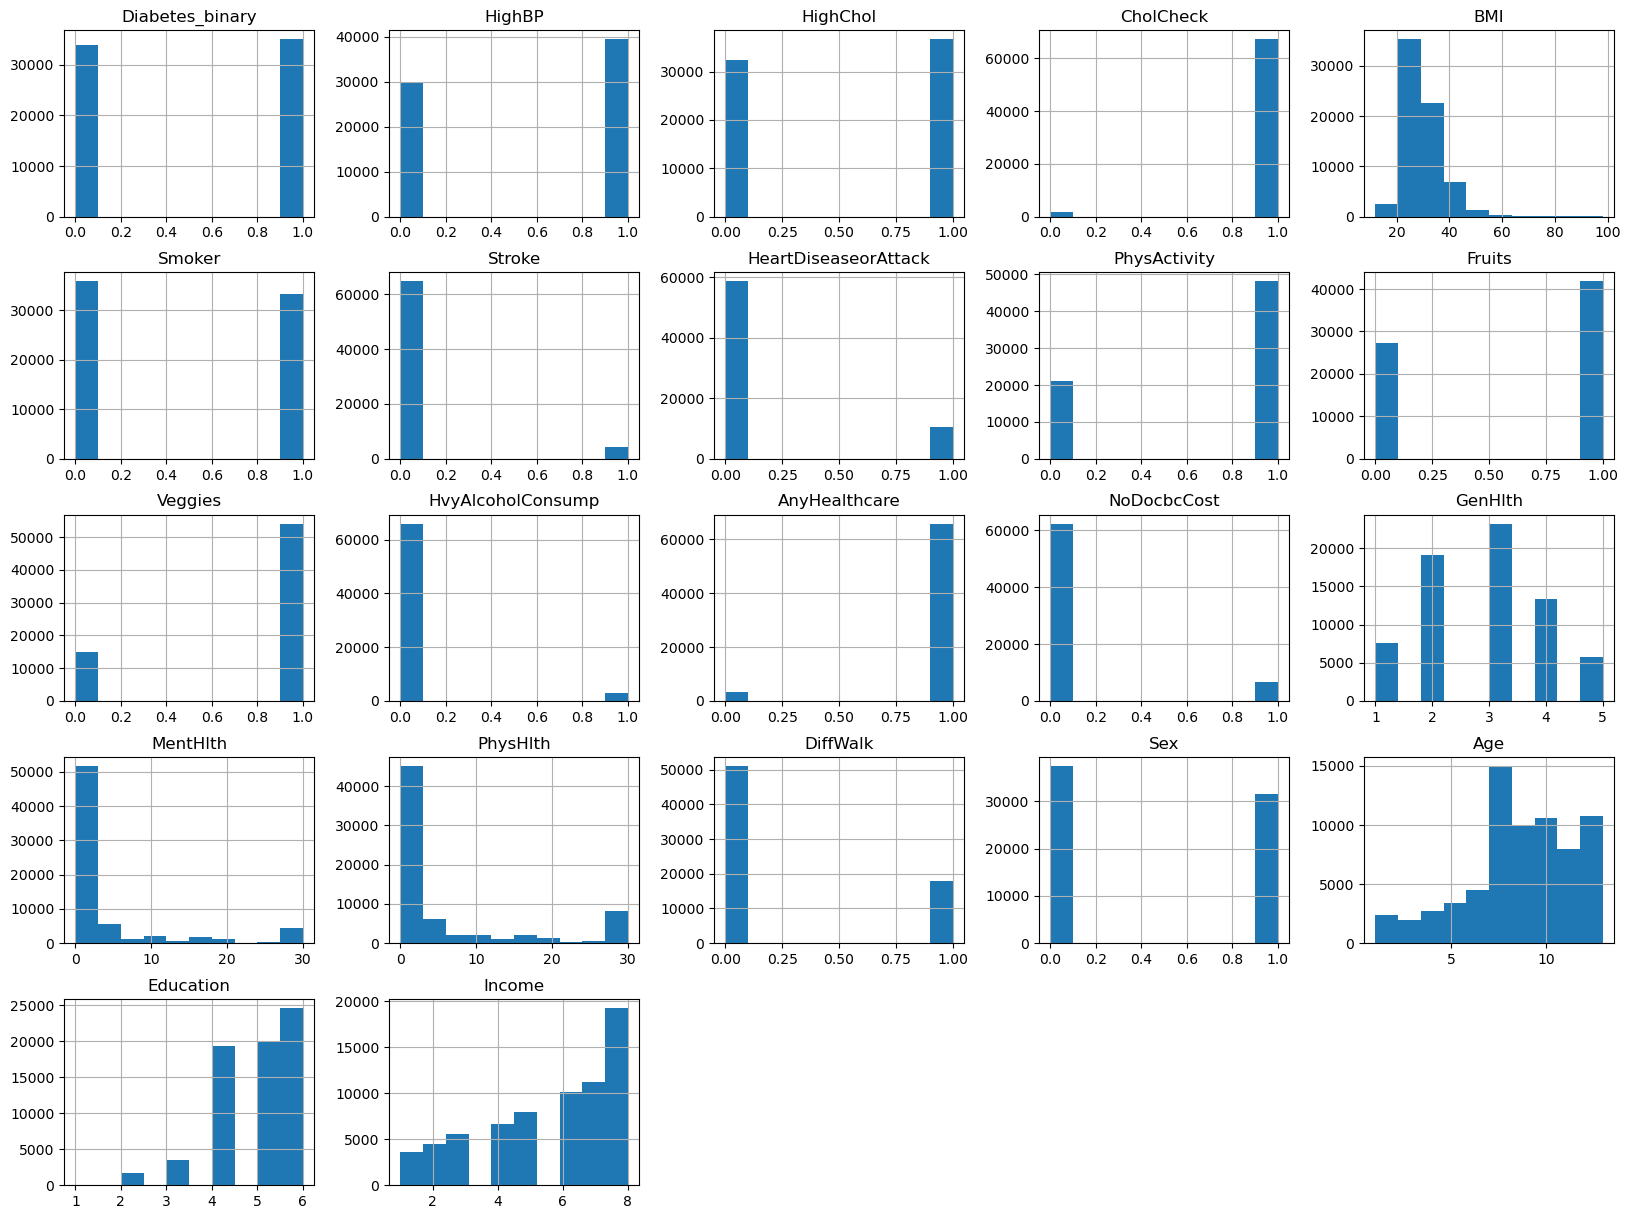

In [255]:
#using histogram to understand dataset

df.hist(figsize=(20,15))

Here we can see which columns are continuous and which ones are discrete.

In [256]:
#check correlation between columns of dataset

df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.372048,0.281399,0.118900,0.285643,0.075853,0.122727,0.207229,-0.150281,-0.044560,-0.072181,-0.098709,0.027034,0.036145,0.396571,0.080688,0.206868,0.267082,0.042538,0.274550,-0.158522,-0.212846
HighBP,0.372048,1.000000,0.308987,0.106593,0.232372,0.078123,0.126869,0.206776,-0.128307,-0.031818,-0.059824,-0.029764,0.039659,0.021802,0.308459,0.058133,0.167821,0.229638,0.037824,0.333721,-0.130037,-0.176360
HighChol,0.281399,0.308987,1.000000,0.088231,0.123917,0.086522,0.098166,0.178207,-0.084469,-0.040783,-0.037801,-0.027259,0.034352,0.029976,0.227588,0.079929,0.138266,0.157859,0.013250,0.235779,-0.075364,-0.098712
CholCheck,0.118900,0.106593,0.088231,1.000000,0.047779,-0.002854,0.023368,0.044795,-0.010072,0.015853,-0.001040,-0.026850,0.106549,-0.061975,0.063116,-0.009365,0.036442,0.046421,-0.008116,0.103414,-0.011266,0.005067
BMI,0.285643,0.232372,0.123917,0.047779,1.000000,0.002761,0.019503,0.055345,-0.164179,-0.076933,-0.050163,-0.060795,-0.010527,0.061861,0.256642,0.099286,0.155661,0.240667,-0.002822,-0.045130,-0.089112,-0.113706
Smoker,0.075853,0.078123,0.086522,-0.002854,0.002761,1.000000,0.061957,0.120457,-0.072401,-0.068192,-0.023760,0.076394,-0.010228,0.031896,0.140658,0.086354,0.114730,0.113713,0.113422,0.099699,-0.130790,-0.093897
Stroke,0.122727,0.126869,0.098166,0.023368,0.019503,0.061957,1.000000,0.222062,-0.076771,-0.005811,-0.044869,-0.024496,0.007801,0.034305,0.186537,0.084800,0.161824,0.189714,0.004149,0.123344,-0.069602,-0.132637
HeartDiseaseorAttack,0.207229,0.206776,0.178207,0.044795,0.055345,0.120457,0.222062,1.000000,-0.093858,-0.014931,-0.032327,-0.038745,0.017603,0.033397,0.271502,0.071530,0.194963,0.229188,0.099020,0.220790,-0.090403,-0.140702
PhysActivity,-0.150281,-0.128307,-0.084469,-0.010072,-0.164179,-0.072401,-0.076771,-0.093858,1.000000,0.127578,0.143392,0.021624,0.024168,-0.059079,-0.264142,-0.124535,-0.228329,-0.270988,0.052069,-0.097456,0.180159,0.186052
Fruits,-0.044560,-0.031818,-0.040783,0.015853,-0.076933,-0.068192,-0.005811,-0.014931,0.127578,1.000000,0.234505,-0.031518,0.026964,-0.042215,-0.086836,-0.057019,-0.041836,-0.044017,-0.088017,0.066048,0.089283,0.068603


Text(0.5, 1.0, 'correlation of feature')

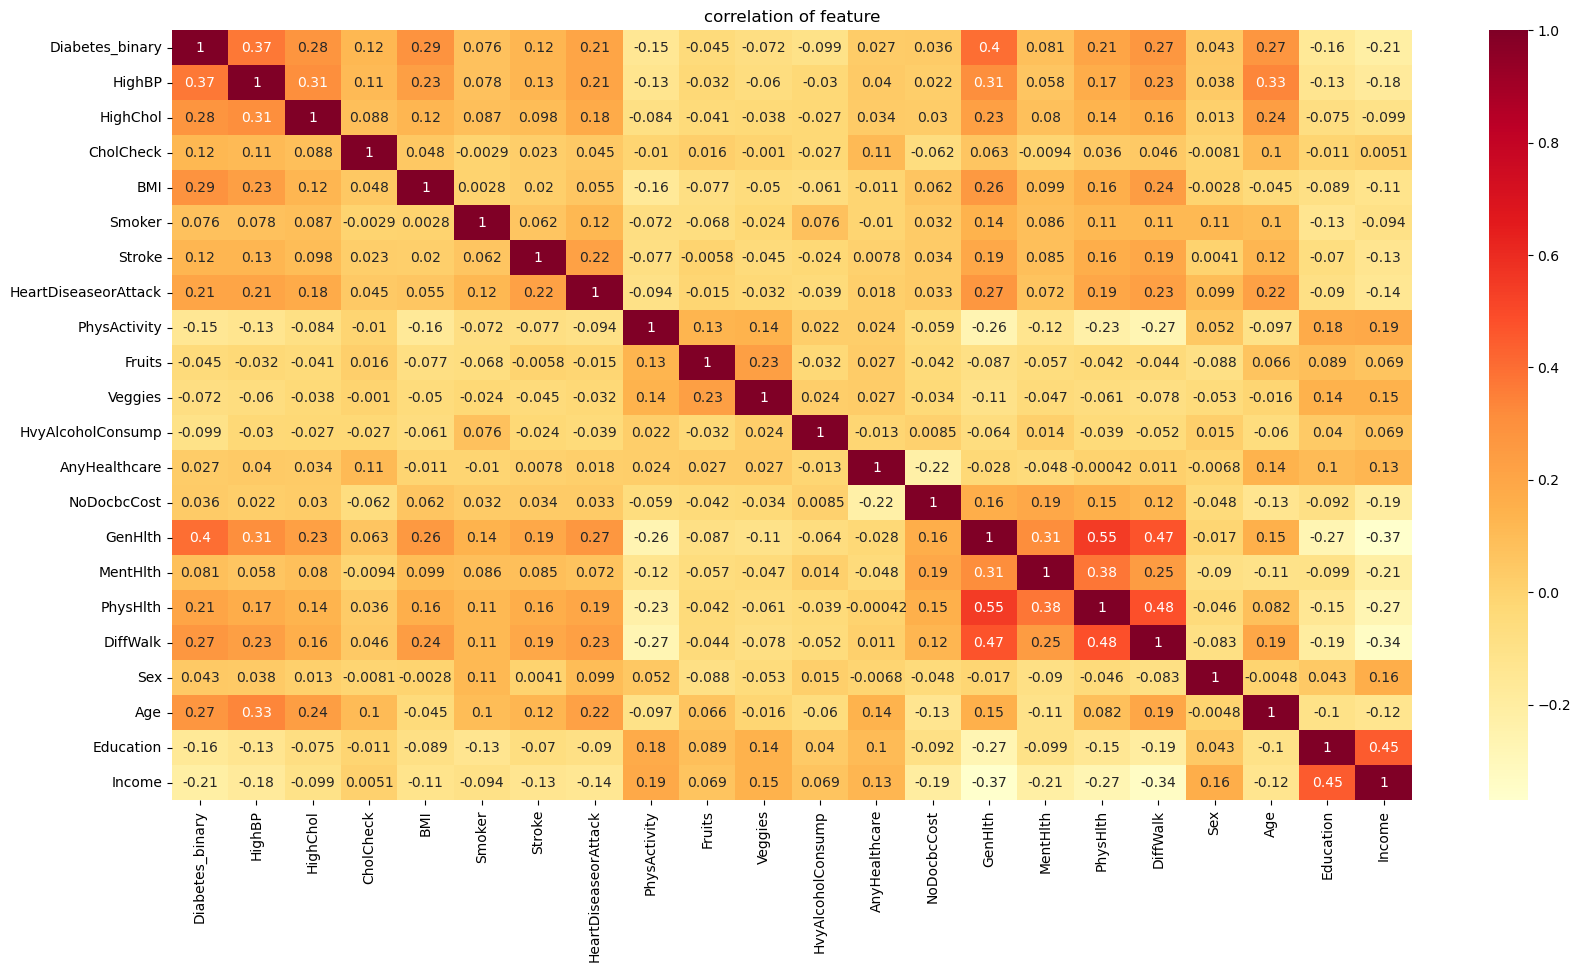

In [257]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

In [258]:
# Replacing 0 into Non-Diabetic and 1 into Diabetic and adding new column Diabetes_string
df["Diabetes_string"]= df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

df["Diabetes_string"].value_counts()

Diabetes_string
Diabetic        35097
Non-Diabetic    33960
Name: count, dtype: int64

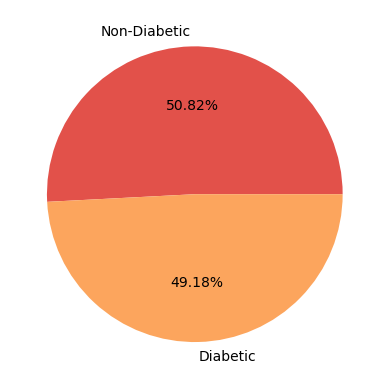

In [259]:
# define Seaborn color palette to use 
palette_color = sns.color_palette("Spectral") 

labels=["Non-Diabetic","Diabetic"]

# plotting data on chart 
plt.pie(df["Diabetes_binary"].value_counts() , labels=labels, colors=palette_color, autopct='%.02f%%') 
  
# displaying chart 
plt.show() 

We can see that the dataset is balanced, with both Non-Diabetic and Diabetic categories showing no significant imbalance.

# Feature Engineering

In [260]:
# Set the maximum column width to None to display the entire content of each column
pd.set_option('display.max_colwidth', None)

# Set the maximum number of rows to None to display all rows
pd.set_option('display.max_rows', None)

# Create a looping for unique values details
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Create into a dataframe
unique_val_df = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df

,Column Name,Number of Unique,Unique Sample
0,Diabetes_binary,2,"[0.0, 1.0]"
1,HighBP,2,"[1.0, 0.0]"
2,HighChol,2,"[0.0, 1.0]"
3,CholCheck,2,"[1.0, 0.0]"
4,BMI,80,"[26.0, 28.0, 29.0, 18.0, 31.0, 32.0, 27.0, 24.0, 21.0, 58.0, 30.0, 20.0, 22.0, 38.0, 40.0, 25.0, 36.0, 47.0, 19.0, 37.0, 41.0, 23.0, 34.0, 35.0, 42.0, 17.0, 33.0, 44.0, 15.0, 52.0, 69.0, 56.0, 45.0, 39.0, 92.0, 53.0, 98.0, 50.0, 46.0, 79.0, 48.0, 16.0, 63.0, 72.0, 54.0, 49.0, 68.0, 43.0, 84.0, 73.0, 76.0, 55.0, 51.0, 75.0, 57.0, 60.0, 12.0, 77.0, 82.0, 67.0, 71.0, 61.0, 14.0, 81.0, 59.0, 86.0, 13.0, 87.0, 65.0, 95.0, 89.0, 62.0, 64.0, 66.0, 85.0, 70.0, 83.0, 80.0, 78.0, 74.0]"
5,Smoker,2,"[0.0, 1.0]"
6,Stroke,2,"[0.0, 1.0]"
7,HeartDiseaseorAttack,2,"[0.0, 1.0]"
8,PhysActivity,2,"[1.0, 0.0]"
9,Fruits,2,"[0.0, 1.0]"


In [261]:
# Numerical Columns
num_cols = ['BMI' , 'MentHlth' , 'PhysHlth' , 'Age' ]

# Ordinal Columns
cat_cols_n = ['HighBP' , 'HighChol' , 'CholCheck' , 'Smoker' , 'Stroke' , 'HeartDiseaseorAttack' , 'PhysActivity' , 'Fruits', 'Veggies' , 'HvyAlcoholConsump' , 'AnyHealthcare' , 'NoDocbcCost', 'DiffWalk' , 'Sex']

# Nominal Columns
cat_cols_o = ['GenHlth' , 'Education', 'Income']

# Split Features (X) and Target (y)

In [262]:
# X contains relevant features
X = df.drop(['Diabetes_binary' , 'Diabetes_string'] , axis = 1)

# y contains target
y = df['Diabetes_binary']

In [263]:
print("Feature:", X.shape)
print("Target:" , y.shape)

Feature: (69057, 21)
Target: (69057,)


In [264]:
# Perform data splitting using 15% of the data as testing data and randomization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (58698, 21)
Test Size  :  (10359, 21)


## Handle Outliers

In [265]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the columns
    for col in data.columns:
        col_name.append(col)

        # calculate skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderately skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normally distributed
        else:
            std = data[col].std()

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result



In [266]:
outdf = X_train[num_cols]
outlier_df = outlier_analysis(outdf)

outlier_df

,columns,skewness,upper boundary,lower boundary,has_outliers
0,BMI,1.724946,57.0,1.0,True
1,MentHlth,2.350351,8.0,-6.0,True
2,PhysHlth,1.623900,24.0,-18.0,True
3,Age,-0.561317,17.0,1.0,False


In [267]:
# Define a function to categorize skewness
def categorize_skewness(skewness):
    if np.abs(skewness) < 0.5:
        return 'low skewness'
    elif np.abs(skewness) < 1:
        return 'high skewness'
    else:
        return 'extreme skewness'

# Apply the function to the 'skewness' column to create a new 'skewness_category' column
outlier_df['skewness_category'] = outlier_df['skewness'].apply(categorize_skewness)

# Define a function to decide on the capping method
def decide_capping_method(skewness_category):
    if skewness_category == 'low skewness':
        return 'Gaussian'
    elif skewness_category == 'high skewness':
        return 'Quantiles'
    else:
        return 'Interquartile Range (IQR)'

# Apply the function to the 'skewness_category' column to create a new 'capping_method' column
outlier_df['capping_method'] = outlier_df['skewness_category'].apply(decide_capping_method)
outlier_df[outlier_df['has_outliers']==True]

,columns,skewness,upper boundary,lower boundary,has_outliers,skewness_category,capping_method
0,BMI,1.724946,57.0,1.0,True,extreme skewness,Interquartile Range (IQR)
1,MentHlth,2.350351,8.0,-6.0,True,extreme skewness,Interquartile Range (IQR)
2,PhysHlth,1.623900,24.0,-18.0,True,extreme skewness,Interquartile Range (IQR)


In [268]:
haveOutlier = outlier_df[(outlier_df['has_outliers']==True)]['columns'].tolist()
haveOutlier

['BMI', 'MentHlth', 'PhysHlth']

In [269]:
exskew = outlier_df[(outlier_df['skewness_category']=='extreme skewness')]['columns'].tolist()
# Capping 
winsoriser_fare = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=2,
    variables=exskew
)

X_train_cap = winsoriser_fare.fit_transform(X_train)
X_test_cap = winsoriser_fare.transform(X_test)

In [270]:
print('X_train_capped : ',len(X_train_cap))
print('X_test_capped : ',len(X_test_cap))
print('y_train : ',len(y_train))

X_train_capped :  58698
X_test_capped :  10359
y_train :  58698


In [271]:
# function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BMI - Before Capping


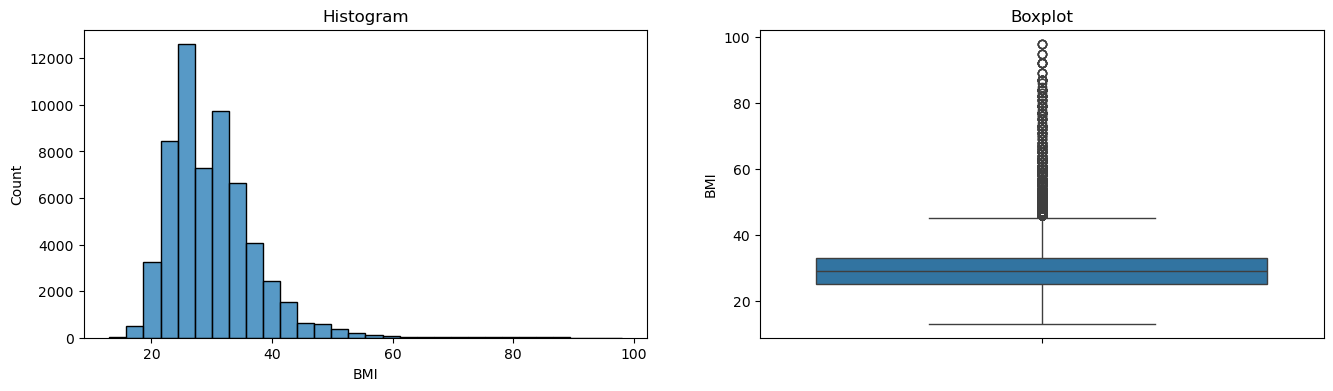


BMI - After Capping


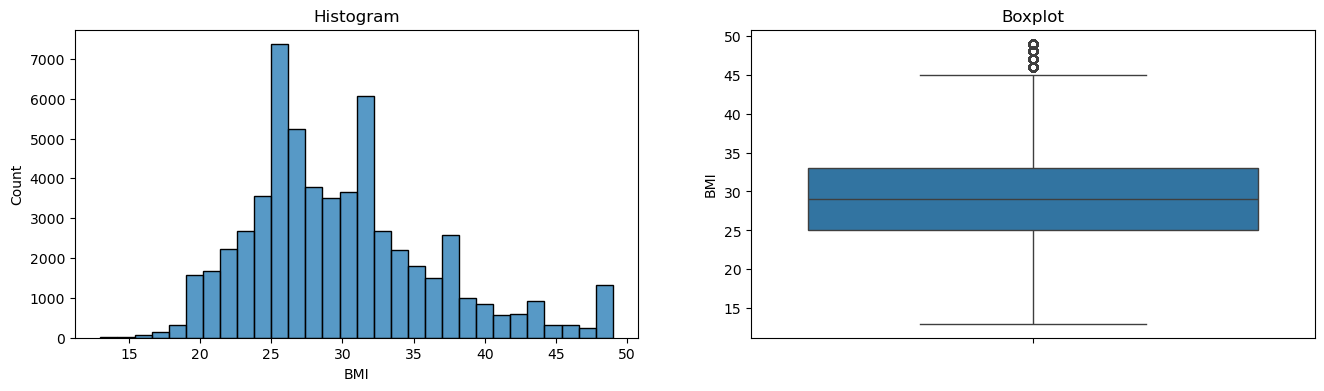

MentHlth - Before Capping


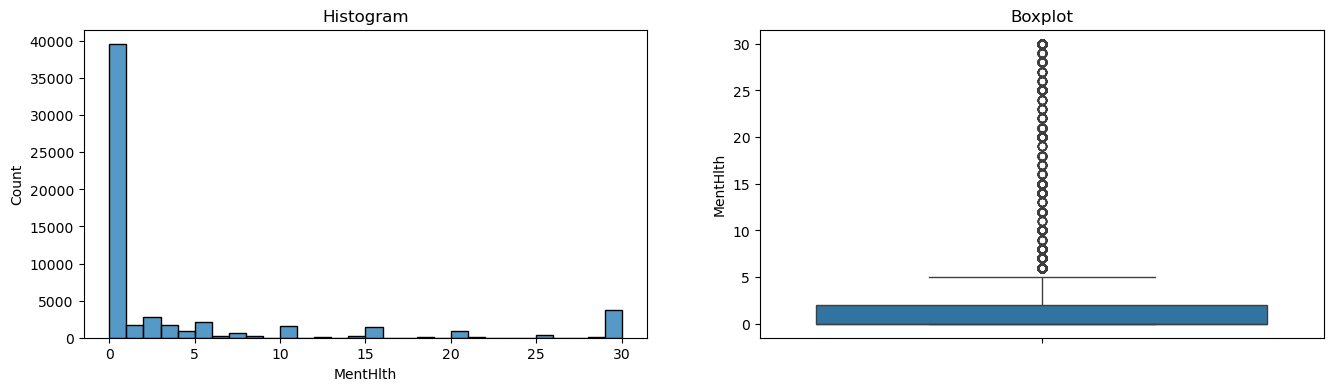


MentHlth - After Capping


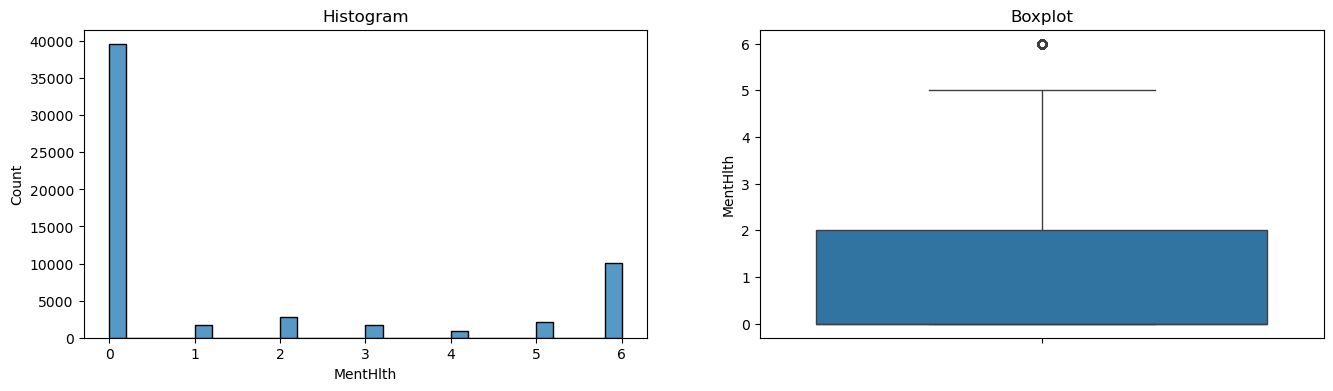

PhysHlth - Before Capping


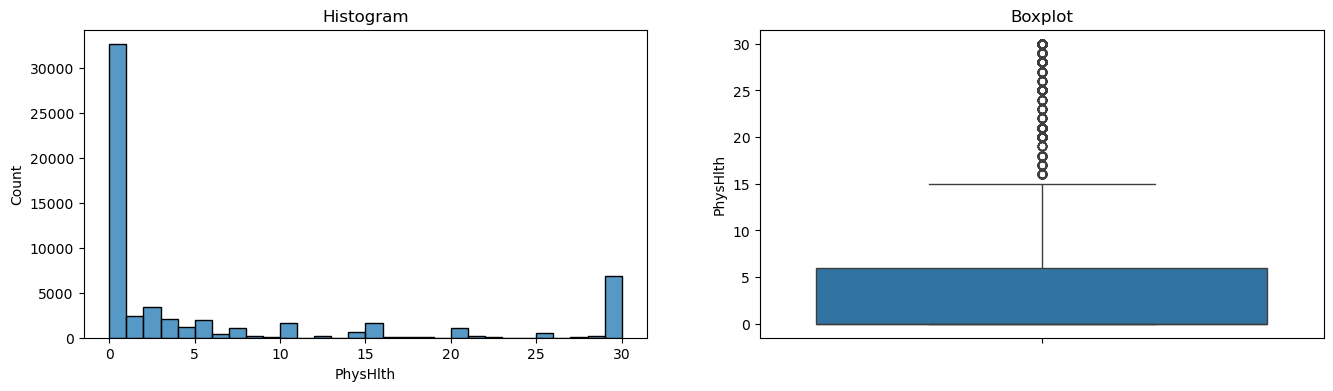


PhysHlth - After Capping


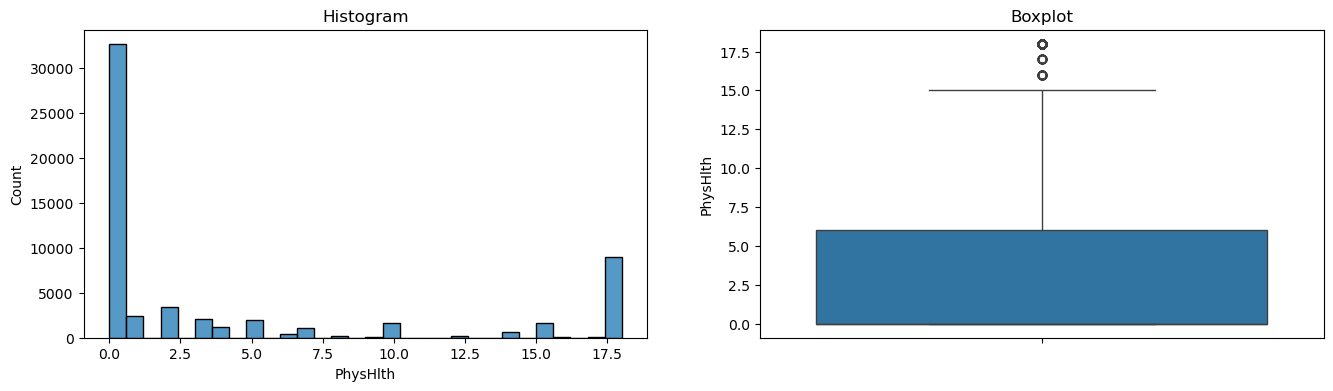

In [272]:
# membuat variabel yang berisi kolom yang mempunyai outlier saja
haveOutlier
# loop
for col in haveOutlier:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_cap, col)

## Feature Selection

### Ordinal

In [293]:
# Set the significance level (alpha)
alpha = 0.05

# Kendall untuk ordinal kolom
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'tau-statistic', 'p-value', 'is_correlated'])

for cat_column in cat_cols_o:
    # mengubah categori mejadi urutan 
    cat_column_num = X_train_cap[cat_column].astype('category').cat.codes
    y_train_num = y_train.astype('category').cat.codes
    
    tau, p = kendalltau(cat_column_num, y_train_num)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # menggunakan concat untuk menggabungkan dataframes
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'tau-statistic': [tau], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the Kendall's Tau test
correlation_df_categorical

/var/folders/04/6fqt654n63g074w0l8j38g3w0000gn/T/ipykernel_63127/2867219640.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df_categorical = pd.concat([


,categorical_column,tau-statistic,p-value,is_correlated
0,GenHlth,0.364507,0.0,Yes
1,Education,-0.144029,0.0,Yes
2,Income,-0.190958,0.0,Yes


### Nominal

In [294]:
# Set the significance level (alpha)
alpha = 0.05

# chi square untuk nominal kolom
correlation_df_categorical = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in cat_cols_n:
    contingency_table = pd.crosstab(X_train_cap[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # menggunakan concat untuk menggabungkan dataframes
    correlation_df_categorical = pd.concat([
        correlation_df_categorical,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test 
correlation_df_categorical

/var/folders/04/6fqt654n63g074w0l8j38g3w0000gn/T/ipykernel_63127/1634179972.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df_categorical = pd.concat([


,categorical_column,chi2-statistic,p-value,is_correlated
0,HighBP,8030.860069,0.000000e+00,Yes
1,HighChol,4585.831451,0.000000e+00,Yes
2,CholCheck,844.575259,1.098806e-185,Yes
3,Smoker,329.337738,1.339767e-73,Yes
4,Stroke,882.228447,7.164494e-194,Yes
5,HeartDiseaseorAttack,2505.087399,0.000000e+00,Yes
6,PhysActivity,1291.158838,9.430512e-283,Yes
7,Fruits,116.415511,3.854553e-27,Yes
8,Veggies,294.218722,5.989042e-66,Yes
9,HvyAlcoholConsump,574.748506,5.204710e-127,Yes


### Numerical

In [295]:
# Set the significance level (alpha)
alpha = 0.05

# spearman untuk num_cols kolom
correlation_df_num = pd.DataFrame(columns=['num_cols column', 'correlation-statistic', 'p-value', 'is_correlated'])

for cont_column in num_cols:
    corr, p = spearmanr(X_train_cap[cont_column], y_train)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'num_cols column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the correlation test 
correlation_df_num

/var/folders/04/6fqt654n63g074w0l8j38g3w0000gn/T/ipykernel_63127/2047577181.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df_num = pd.concat([


,num_cols column,correlation-statistic,p-value,is_correlated
0,BMI,0.318512,0.000000e+00,Yes
1,MentHlth,0.044719,2.234753e-27,Yes
2,PhysHlth,0.207326,0.000000e+00,Yes
3,Age,0.252793,0.000000e+00,Yes


Based on our correlation check, all features is correlated to our target.

## Scaling and Encoding

In [273]:
# Separated the train set into ordinal, nominal and numerical
X_train_cat_o = X_train_cap[cat_cols_o]
X_train_cat_n = X_train_cap[cat_cols_n]
X_train_num = X_train_cap[num_cols]

# Separated the test set into ordinal, nominal and numerical
X_test_cat_o = X_test_cap[cat_cols_o]
X_train_cat_n = X_train_cap[cat_cols_n]
X_test_num = X_test_cap[num_cols]

In [274]:
#pipeline to scale numeric column
num_pipeline = make_pipeline(MinMaxScaler())

#preprocessing pipeline to combine and transform the data
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_cols)
])

We will not perform encoding as our data is already encoded.

# Model Definition

## KNN

In [275]:
clfKNN = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
clfKNN.fit(X_train_cap, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth', 'Age'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## SVM

In [276]:
clfSVM = make_pipeline(preprocessing_pipeline, SVC())
clfSVM.fit(X_train_cap, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth', 'Age'])])),
                ('svc', SVC())])

## Decision Tree

In [277]:
model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_cap, y_train)

DecisionTreeClassifier(max_depth=6, random_state=10)

## Random Forest

In [278]:
rf = RandomForestClassifier(n_estimators=50,
                                 min_samples_leaf=10,
                                 random_state=10)
rf.fit(X_train_cap, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=50, random_state=10)

## Boosting

In [279]:
ada_clf = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=10), random_state=10))
ada_clf.fit(X_train_cap, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth', 'Age'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                     random_state=10),
                                    random_state=10))])

## Cross Validation

In [280]:
skfold=StratifiedKFold(n_splits=5)

# checking cross validation score
cv_svm_model = cross_val_score(clfSVM, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(model_dt, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(clfKNN, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_clf, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_ada_model],['svm_model','dt_model','rf_model','knn_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

svm_model
recall - All - Cross Validation  :  [0.741524   0.76267204 0.76871433 0.75025176 0.75088132]
recall - Mean - Cross Validation :  0.7548086902086639
recall - Std - Cross Validation  :  0.00967338585486968
recall - Range of Test-Set       :  0.7451353043537943 - 0.7644820760635336
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.73900638 0.78499496 0.74974824 0.77811346 0.75625315]
recall - Mean - Cross Validation :  0.7616232377693036
recall - Std - Cross Validation  :  0.017317857396559527
recall - Range of Test-Set       :  0.7443053803727441 - 0.7789410951658632
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.78818395 0.7992615  0.8001007  0.79154079 0.78680544]
recall - Mean - Cross Validation :  0.7931784761812346
recall - Std - Cross Validation  :  0.005534677538573284
recall - Range of Test-Set       :  0.7876437986426613 - 0.7987131537198079
----------------------------

We want cross validate the recall score as our data is health-related and therefore it is vital to minimize False negative as low as possible.

## HyperParameter Tuning

In [281]:
# Define the parameter grid for RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start=50, stop=200, num=5)]
max_depth = [int(x) for x in np.linspace(10, 50, num=5)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
}

# Initialize the RandomizedSearchCV with RandomForestClassifier
gridRandomForest = RandomizedSearchCV(
    RandomForestClassifier(random_state=10),
    param_distributions=param_grid,
    cv=5,
    n_iter=20,
    random_state=10,
    n_jobs=-1,
    scoring='recall'
)

# Fit the model (assuming X_train_cap and y_train are defined)
gridRandomForest.fit(X_train_cap, y_train)

# Print the best cross-validation recall score
print('Best cross-validation recall: {:.2f}'.format(gridRandomForest.best_score_))

# Print the best parameters
print('Best parameters: ', gridRandomForest.best_params_)

# Print the recall score on the test set (assuming X_test and y_test are defined)
print('Test set recall: {:.2f}'.format(gridRandomForest.score(X_test, y_test)))


Best cross-validation recall: 0.79
Best parameters:  {'n_estimators': 87, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Test set recall: 0.81


In [282]:
best_model_rf = gridRandomForest.best_estimator_
best_model_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=87, random_state=10)

# Model Evaluation

Recall - Test Set   :  0.8087792012057272 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      5051
         1.0       0.74      0.81      0.77      5308

    accuracy                           0.76     10359
   macro avg       0.76      0.76      0.76     10359
weighted avg       0.76      0.76      0.76     10359
 

Confusion Matrix      : 


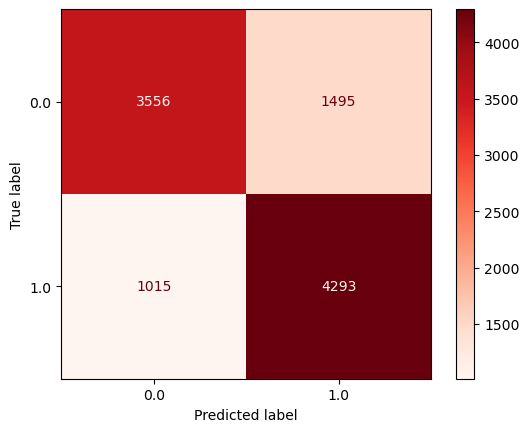

In [283]:
# Check Performance Model against Test-Set

y_pred_test = best_model_rf.predict(X_test) 

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test, y_test, cmap='Reds'))

# Model Saving

In [284]:
with open('model_rf.pkl', 'wb') as file_1:
    pickle.dump(rf, file_1)

In [285]:
inf = df_ori.head(3).to_dict()
inf

{'Diabetes_binary': {0: 0.0, 1: 0.0, 2: 0.0},
 'HighBP': {0: 1.0, 1: 1.0, 2: 0.0},
 'HighChol': {0: 0.0, 1: 1.0, 2: 0.0},
 'CholCheck': {0: 1.0, 1: 1.0, 2: 1.0},
 'BMI': {0: 26.0, 1: 26.0, 2: 26.0},
 'Smoker': {0: 0.0, 1: 1.0, 2: 0.0},
 'Stroke': {0: 0.0, 1: 1.0, 2: 0.0},
 'HeartDiseaseorAttack': {0: 0.0, 1: 0.0, 2: 0.0},
 'PhysActivity': {0: 1.0, 1: 0.0, 2: 1.0},
 'Fruits': {0: 0.0, 1: 1.0, 2: 1.0},
 'Veggies': {0: 1.0, 1: 0.0, 2: 1.0},
 'HvyAlcoholConsump': {0: 0.0, 1: 0.0, 2: 0.0},
 'AnyHealthcare': {0: 1.0, 1: 1.0, 2: 1.0},
 'NoDocbcCost': {0: 0.0, 1: 0.0, 2: 0.0},
 'GenHlth': {0: 3.0, 1: 3.0, 2: 1.0},
 'MentHlth': {0: 5.0, 1: 0.0, 2: 0.0},
 'PhysHlth': {0: 30.0, 1: 0.0, 2: 10.0},
 'DiffWalk': {0: 0.0, 1: 0.0, 2: 0.0},
 'Sex': {0: 1.0, 1: 1.0, 2: 1.0},
 'Age': {0: 4.0, 1: 12.0, 2: 13.0},
 'Education': {0: 6.0, 1: 6.0, 2: 6.0},
 'Income': {0: 8.0, 1: 8.0, 2: 8.0}}

# Conclusion

The data that was provided is already balanced and therefore does not require major changes. During correlation check, we have found that majority if not all the features has a correlation to the target and therefore no columns has to be dropped. The best model that was found is the RandomForest Classifier. Overall the entire dataset requires very minor adjustments.

HuggingFace Link: https://huggingface.co/spaces/utomon/PredictionDiabetes